<a href="https://colab.research.google.com/github/AlbertoCamarillo93/Azure/blob/main/OCR_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos la paqueteria de Microsoft para consumir los recursos de Cognitive.

In [7]:
!pip install --upgrade azure-cognitiveservices-vision-computervision -q

     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 


In [ ]:
cog_key = "CLAVE"
cog_endpoint = "PÁGINA HTTP"

print('Listo para usar Cognitive Service de {} usando la clave {}'.format(cog_endpoint, cog_key))

Se importan las bibliotecas necesarias.

e.
MUG—1 3—13 12—729952
scr
Estado OExbo
--18-13
TRANSPORTE PRIVADO AUTOMÓVIL


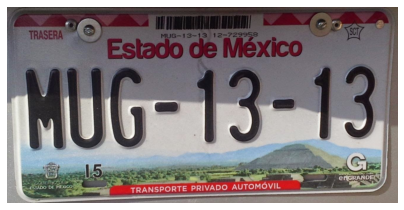

In [11]:
# Funcionalidades para conectarnos con nuestro recurso de Cognitive Services
# y validar nuestro acceso.
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# Paquetería de Python para acceder a recursos de la máquina.
from array import array
import os
from PIL import Image, ImageDraw # Este es para trabajar con imágenes.
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline

#Solicita el cliente para computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

#Lee el archivo de la imagen
image_path = os.path.join('data', 'ocr', 'placas-de-autos-36c4.jpg')
image_stream = open(image_path, "rb")

#Usa Computer Vision Service para encontrar el texto en la imagen
read_results = computervision_client.recognize_printed_text_in_stream(image_stream)

#Procesa el texto linea por linea
for region in read_results.regions:
  #Lee las palabras en la linea del texto
  for line in region.lines:
    line_text = ''
    for word in line.words:
      line_text += word.text + ' '
    print(line_text.rstrip())

#Abre la imagen en consola
fig = plt.figure(figsize = (7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)
plt.axis('off')
plt.imshow(img)

Ahora analizaremos la imagen de una placa y de este modo se consume el serivcio, para ello, primero declaramos el url de una imagen.

e.
MUG—13—1312—729952
scr
EstadoOExbo
--18-13
TRANSPORTEPRIVADOAUTOMÓVIL


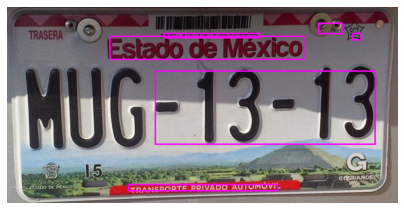

In [12]:
#Abre la imagen en consola
fig = plt.figure(figsize = (7, 7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

#Procesa texto linea por linea
for region in read_results.regions:
  #Muestra la posición de la linea del texto
  for line in region.lines:
    l, t, w, h = list(map(int, line.bounding_box.split(',')))
    draw.rectangle(((l, t), (l + w, t + h)), outline = 'magenta', width = 5)
    #Lee las palabras en la linea del texto
    line_text = ''
    for word in line.words:
      line_text +=word.text + ''
    print(line_text.rstrip())

#Muestra la imagen en consola con el texto de la localización
plt.axis('off')
plt.imshow(img)


Usando la API de Read

MORELOS
MORELOS
---
TRASERA
PYC-58-77
MÉXICO
TRANSPORTE PRIVADO AUTOMOVIL




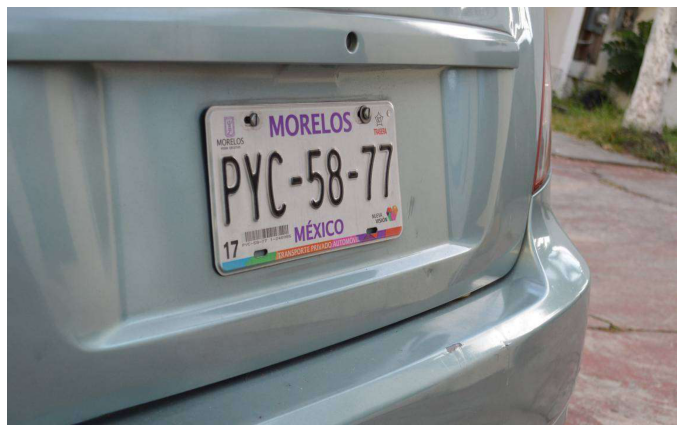

In [16]:
# Funcionalidades para conectarnos con nuestro recurso de Cognitive Services
# y validar nuestro acceso.
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials

# Paquetería de Python para acceder a recursos de la máquina.
import os
from PIL import Image, ImageDraw # Este es para trabajar con imágenes.
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline


#Lee el archivo de la imagen
image_path = os.path.join('data', 'ocr', 'morelos_placa.jpeg')
image_stream = open(image_path, "rb")

#Solicita el cliente para computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

#Enviar una solicitud para leer el texto impreso en la imagen y obtener la identificación de la operación
read_operation = computervision_client.read_in_stream(image_stream, raw = True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split('/')[-1]

#Espera a que la operación de asincronización se acomplete
while True:
  read_results = computervision_client.get_read_result(operation_id)
  if read_results.status not in [OperationStatusCodes.running]:
    break
  time.sleep(1)

#Si la operación fue exitosa lee el texto linea por linea
if read_results.status == OperationStatusCodes.succeeded:
  for result in read_results.analyze_result.read_results:
    for line in result.lines:
      print(line.text)

#Abre la imagen en consola
print('\n')
fig = plt.figure(figsize = (12, 12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)